In [407]:
import spacy
import random
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from itertools import combinations
from collections import defaultdict

In [408]:
def adjust_labels(labels, max_width=20):
    """ Ajusta os rótulos inserindo quebras de linha de forma inteligente. """
    new_labels = []
    for label in labels:
        words = label.split("/")  # Divide o texto nas barras
        lines = []
        current_line = ''
        for word in words:
            for subword in textwrap.wrap(word, width=max_width):
                if current_line and len(current_line) + len(subword) > max_width:
                    lines.append(current_line.strip())
                    current_line = subword
                elif current_line:
                    current_line += ' ' + subword
                else:
                    current_line = subword
        if current_line:
            lines.append(current_line.strip())
        wrapped_label = '\n'.join(lines)
        new_labels.append(wrapped_label)
    return new_labels

In [409]:
file = 'data.csv'
data = pd.read_csv(file)

data.head()

,Carimbo de data/hora,Anos de Experiência,Tamanho Médio da Equipe,Tempo de Mercado da Startup,Cargo,Fonte de Requisitos,Análise de Documentos,Brainstorming,Entrevistas,Observação,...,Testes de Usuário,Repetição da Descoberta,Esse processo é feito mais de uma vez?,Frequência de solicitações de mudança,Origem das solicitações de mudança,Metodologia de gerenciamento,Criterios de análise de solicitação de mudança,Critérios Dimensões,Consequências da solicitação de mudanças,Comentários
0,09/11/2023 11:29:59,18,3,5,CTO,"Clientes, Time de Marketing, Time de Produto",Sempre,Frequentemente,Sempre,Às Vezes,...,Às Vezes,Frequentemente,Sim,Sempre,"Desenvolvedores, Product Owners, Stakeholders,...","Kanban, Scrum","Contrato, Custo, Prazos","Contrato, Custos, Prazos","Análise de Impacto, Avaliação de Risco, Implem...",Foquei as respostas nos produtos de software q...
1,23/11/2023 09:35:08,3,13,3,Product Owner,"Usuários, Time de Desenvolvimento, Time de Des...",Sempre,Sempre,Frequentemente,Sempre,...,Frequentemente,Frequentemente,Sim,Raramente,Product Owners,"Kanban, Scrum",Não há critérios específicos pois raramente ac...,"Escopo, Valor para o Negócio, Necessidade do C...",Avaliação de Risco,NaN
2,23/11/2023 09:39:45,2,4,2,Product Manager,Stakeholders,Às Vezes,Sempre,Frequentemente,Frequentemente,...,Sempre,Sempre,Sim,Raramente,"Stakeholders, Usuários Finais",Scrum,Mudança no negócio,Valor para o Negócio,"Revisão do Projeto, Revisão da Sprint",NaN
3,23/11/2023 10:06:54,3,5,2,Product Manager,Diretoria,Sempre,Às Vezes,Frequentemente,Sempre,...,Às Vezes,Às Vezes,Às vezes,Sempre,Stakeholders,Scrum,Análise de Indicadores,Métricas do Negócio,"Análise de Impacto, Revisão da Sprint, Impleme...",NaN
4,28/11/2023 09:43:29,20,20,60,Analista de Sistemas,"Time de Operações, Time Comercial, Time Financ...",Às Vezes,Frequentemente,Sempre,Frequentemente,...,Às Vezes,Às Vezes,Às vezes,Frequentemente,Desenvolvedores,Scrum,"Prazos, Custo, Viabilidade","Prazos, Custos, Prazos","Análise de Impacto, Avaliação de Risco, Revisã...",A mudanças não necessárias e precisam ser aval...


### Origem e Frequência das Mudanças

In [410]:
origem = data['Origem das solicitações de mudança'].str.split(', ')
origem_contagem = origem.explode().value_counts()
origem_contagem = pd.Series(origem_contagem)

origem_contagem

Origem das solicitações de mudança
Stakeholders            7
Product Owners          6
Usuários Finais         5
Product Managers        5
Desenvolvedores         3
Analista de Negócios    1
Name: count, dtype: int64

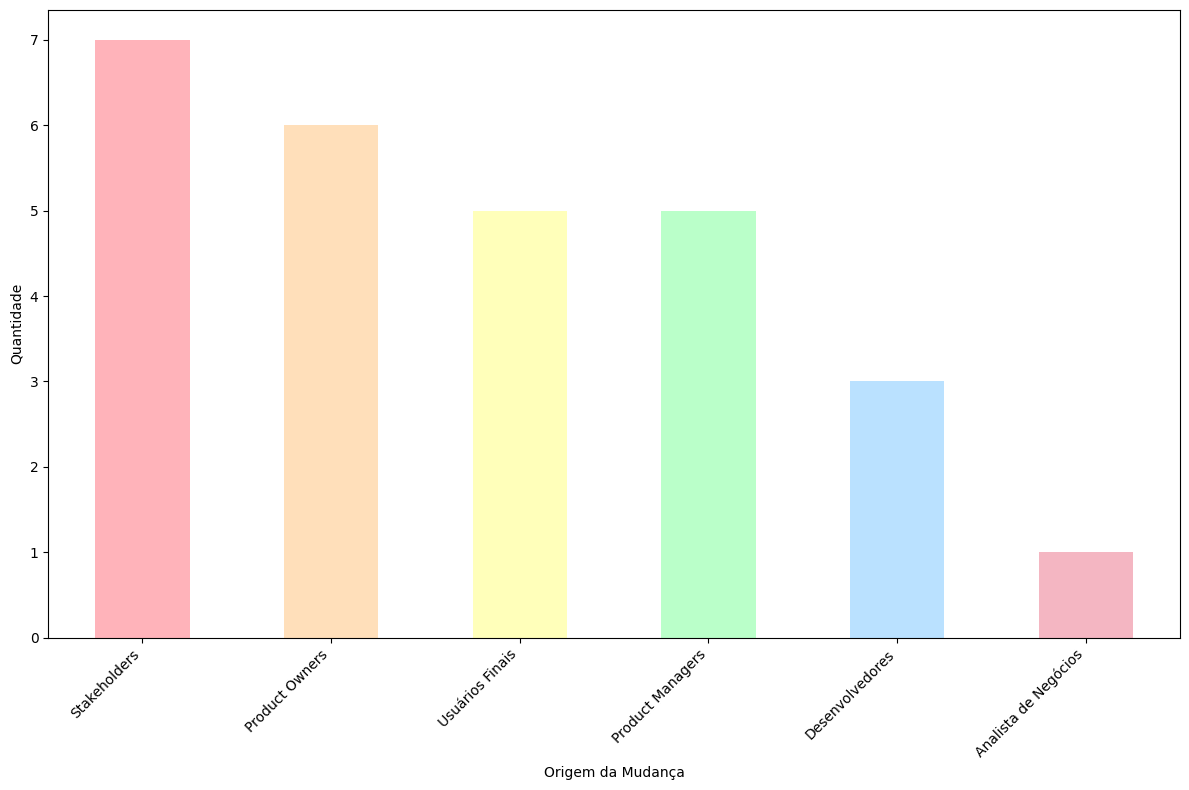

In [411]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
                 '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5',
                 '#fde0e4', '#f8d7da', '#fce8a9', '#d3f9d8', '#a9def9',
                 '#e4c1f9', '#d5a6bd', '#ced2f6', '#d1e8e4', '#e0ece4']

color_cycle = pastel_colors * (len(origem_contagem) // len(pastel_colors) + 1)
colors = color_cycle[:len(origem_contagem)]

plt.figure(figsize=(12, 8))
origem_contagem.plot(kind='bar', color=colors)
plt.ylabel('Quantidade')
plt.xlabel('Origem da Mudança')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('plots/q4/origem_mudanca.png', transparent=True)
plt.show()

In [412]:
data['Frequência de solicitações de mudança'].dropna().value_counts()

Frequência de solicitações de mudança
Sempre            4
Raramente         4
Frequentemente    3
Às Vezes          2
Name: count, dtype: int64

/var/folders/kr/0wtlfsjx58j82_v81f5hkqsr0000gn/T/ipykernel_47029/1088611038.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Frequência de solicitações de mudança", y="Origem", data=data_grouped, palette="Pastel1")


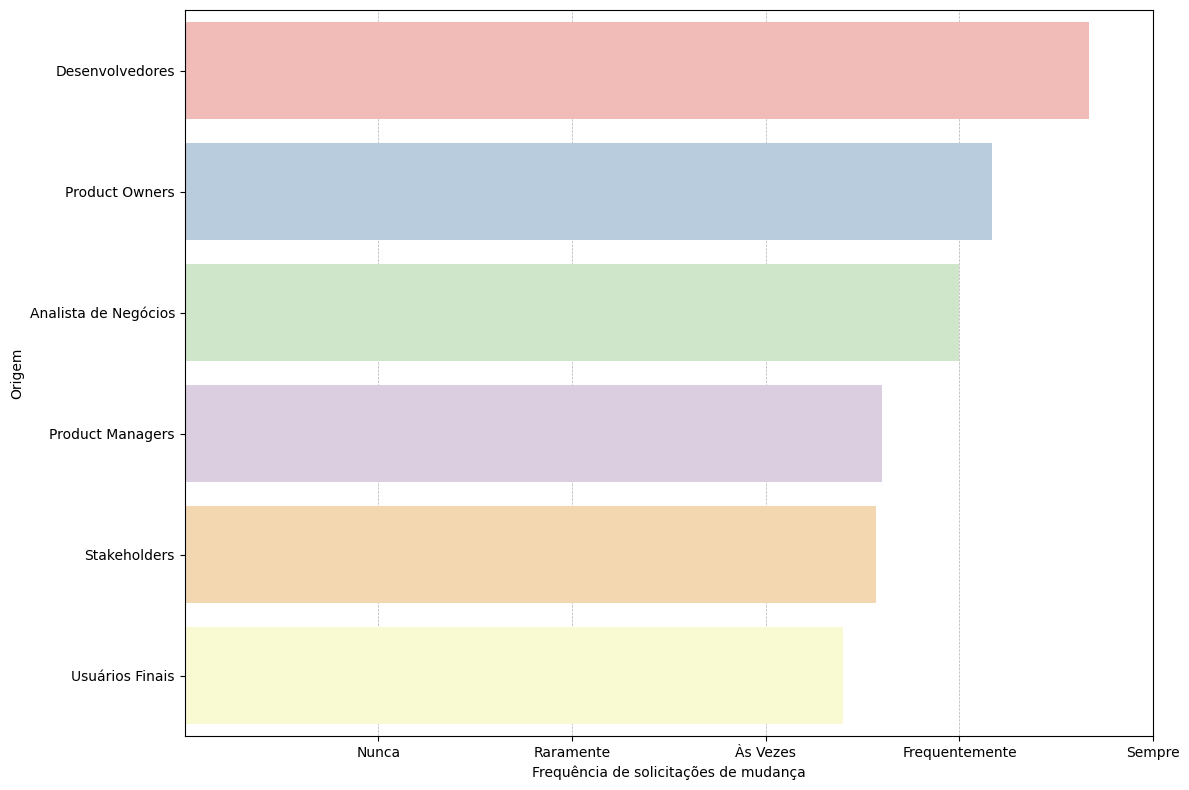

In [413]:
# Mapear a escala Likert para valores numéricos
likert_scale = {
    "Nunca": 1,
    "Raramente": 2,
    "Às Vezes": 3,
    "Frequentemente": 4,
    "Sempre": 5
}

# Mapeamento reverso para rótulos da escala Likert
likert_labels = {v: k for k, v in likert_scale.items()}

data["Frequência de solicitações de mudança"] = data["Frequência de solicitações de mudança"].map(likert_scale)

# Dividir a coluna de origens em listas
data["Origem das solicitações de mudança"] = data["Origem das solicitações de mudança"].str.split(", ")

# Explodir a lista de origens em linhas individuais
data_exploded = data.explode("Origem das solicitações de mudança")

# Renomear a coluna para simplificar
data_exploded = data_exploded.rename(columns={"Origem das solicitações de mudança": "Origem"})

# Agrupar por origem e calcular a média das frequências
data_grouped = data_exploded.groupby("Origem")["Frequência de solicitações de mudança"].mean().reset_index()

# Ordenar por frequência média para melhor visualização
data_grouped = data_grouped.sort_values(by="Frequência de solicitações de mudança", ascending=False)

# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))
bar_plot = sns.barplot(x="Frequência de solicitações de mudança", y="Origem", data=data_grouped, palette="Pastel1")

ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
# Personalizar o eixo x para mostrar os rótulos da escala Likert
bar_plot.set_xticks(list(likert_scale.values()))
bar_plot.set_xticklabels([likert_labels[val] for val in likert_scale.values()])

plt.tight_layout()
plt.savefig('plots/q4/origem_frequencia.png', transparent=True)

# plt.xlabel("Frequência Média de Solicitações de Mudança")
# plt.ylabel("Origem das Solicitações de Mudança")
# plt.title("Frequência Média de Solicitações de Mudança por Origem")
plt.show()

### Análise de Mudança

In [414]:
dimensoes = data['Critérios Dimensões'].str.split(', ')
dimensoes_contagem = dimensoes.explode().value_counts()
dimensoes_contagem

Critérios Dimensões
Valor para o Negócio      7
Prazos                    6
Custos                    4
Necessidade do Cliente    3
Contrato                  2
Métricas do Negócio       2
Impacto                   2
Esforço                   2
Complexidade              2
Escopo                    1
Usabilidade               1
Risco                     1
Origem                    1
Frequência                1
Hierarquia                1
Name: count, dtype: int64

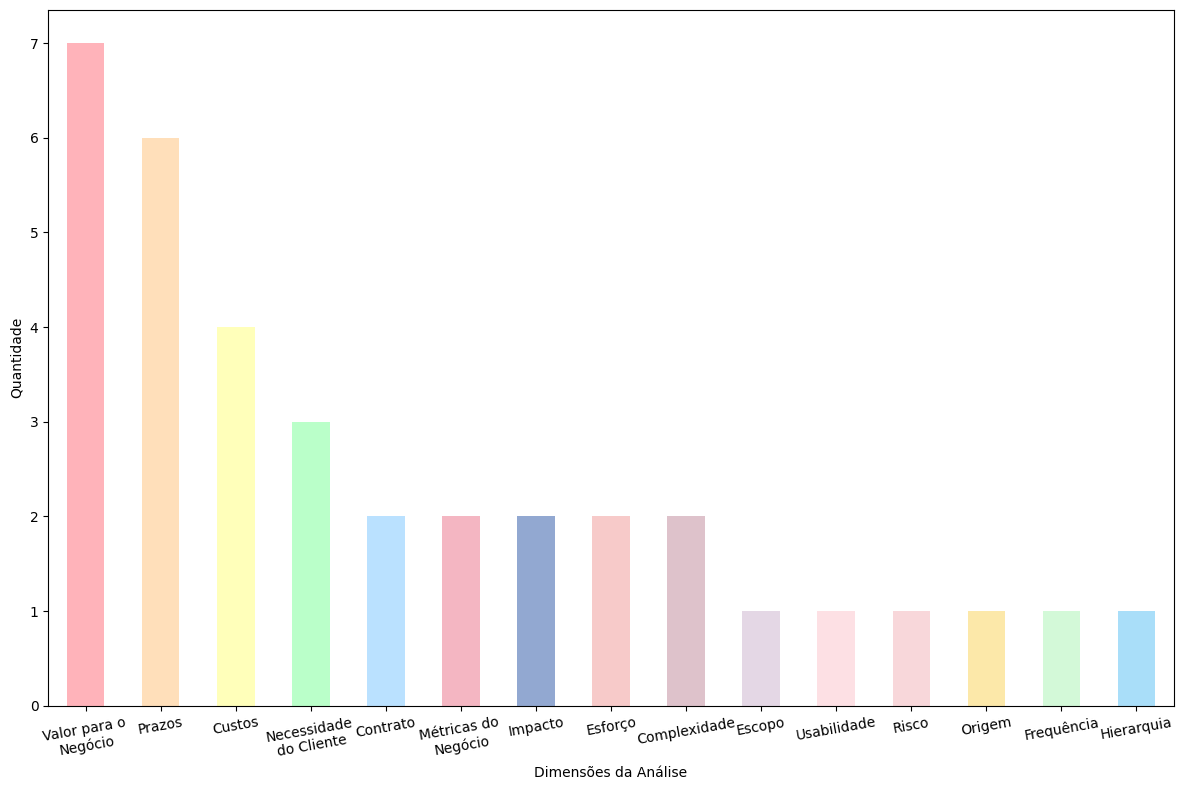

In [415]:
pastel_colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9', '#bae1ff',
                 '#f4b6c2', '#92a8d1', '#f7cac9', '#dec2cb', '#e4d7e5',
                 '#fde0e4', '#f8d7da', '#fce8a9', '#d3f9d8', '#a9def9',
                 '#e4c1f9', '#d5a6bd', '#ced2f6', '#d1e8e4', '#e0ece4']

color_cycle = pastel_colors * (len(dimensoes_contagem) // len(pastel_colors) + 1)
colors = color_cycle[:len(dimensoes_contagem)]

origem = list(dimensoes_contagem.keys())
adjusted_labels = adjust_labels(origem, max_width=12)

fig, ax = plt.subplots(figsize=(12, 8))
dimensoes_contagem.plot(kind='bar', color=colors)
plt.ylabel('Quantidade')
plt.xlabel('Dimensões da Análise')
# plt.xticks(rotation=10, ha='center')

ax.set_xticks(range(len(adjusted_labels)))
ax.set_xticklabels(adjusted_labels, rotation=10, ha='center')

plt.tight_layout()
plt.savefig('plots/q4/dimensoes_analise.png', transparent=True)
plt.show()

In [416]:
texto = data['Criterios de análise de solicitação de mudança'].str.cat(sep=', ')

texto = ''.join(texto)
texto

'Contrato, Custo, Prazos, Não há critérios específicos pois raramente acontece durante o desenvolvimento, Escopo da Mudança, Retorno para o Negócio, Necessidade do Cliente, Mudança no negócio , Análise de Indicadores, Prazos, Custo, Viabilidade, Impacto/perdas ou ganhos no negócio dessa alteração considerando os outros clientes/usuários dos produtos\n\nEsforço e complexidade da alteração\n\nImpacto da alteração nos módulos já existentes e em bancos de dados e instâncias de clientes ativos, Usabilidade, Inovação, Impacto, Nível de Risco, Clareza do Risco, Gatilho da Mudança, Frequência da Mudança, Fechamento de Mudanças, Solicitações de mudanças são sempre aceitas pois top down, Análise de Indicadores, Fluxo de Usuário no Produto, Necessidade do Cliente, Limitação de Recursos, Geração de Valor, Avaliação de Complexidade, Avaliação de Esforço, Retorno para o Negócio, Impacto no Desenvolvimento, Experiência do Usuário, Prazos'

In [417]:
# # Função para gerar cores em tons pastéis
# def pastel_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
#     return "hsl({}, 100%, 80%)".format(random.randint(0, 360))

# # Gerar a nuvem de palavras
# wordcloud = WordCloud(width=2000,
#                       height=1000,
#                       background_color=None,
#                       mode='RGBA',
#                       color_func=pastel_color_func).generate(texto)

# # Exibir a nuvem de palavras
# plt.figure(figsize=(100, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig('plots/q4/nuvem_criterios.png', format='png', transparent=True)
# plt.show()

In [418]:
# nlp = spacy.load('pt_core_news_sm')

# doc = nlp(texto)
# palavras_filtradas = [token.text for token in doc if not token.is_stop and token.is_alpha]
# texto_filtrado = ' '.join(palavras_filtradas)

# # Gerar a nuvem de palavras
# wordcloud = WordCloud(width=2000,
#                       height=1000,
#                       background_color=None,
#                       mode='RGBA',
#                       color_func=pastel_color_func).generate(texto_filtrado)

# # Exibir a nuvem de palavras
# plt.figure(figsize=(100, 50))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig('plots/q4/nuvem_criterios_filtrada.png', format='png', transparent=True)
# plt.show()

### Gerenciamento

In [419]:
data['Metodologia de gerenciamento']

0     Kanban, Scrum
1     Kanban, Scrum
2             Scrum
3             Scrum
4             Scrum
5            Kanban
6            Kanban
7             Scrum
8     Kanban, Scrum
9             Scrum
10           Kanban
11           Kanban
12           Kanban
13              NaN
14              NaN
Name: Metodologia de gerenciamento, dtype: object

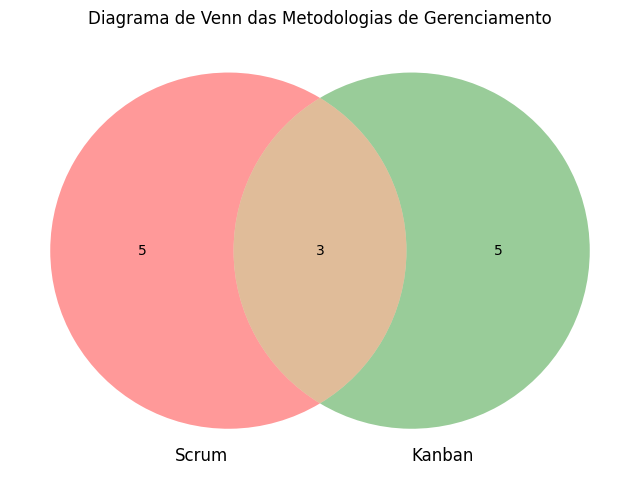

In [420]:
# Preencher valores NaN com uma string vazia para evitar erros
data["Metodologia de gerenciamento"] = data["Metodologia de gerenciamento"].fillna("")

# Contar as ocorrências
scrum = data["Metodologia de gerenciamento"].apply(lambda x: x == "Scrum").sum()
kanban = data["Metodologia de gerenciamento"].apply(lambda x: x == "Kanban").sum()
ambos = data["Metodologia de gerenciamento"].apply(lambda x: x == "Kanban, Scrum").sum()

# Ajustar as contagens para o diagrama de Venn
scrum_total = scrum + ambos
kanban_total = kanban + ambos

# # Definir a paleta de cores pastéis
# colors = sns.color_palette("Pastel1", 2)

# Criar o diagrama de Venn
plt.figure(figsize=(8, 8))
venn = venn2(subsets=(scrum_total - ambos, kanban_total - ambos, ambos), 
             set_labels=('Scrum', 'Kanban'))
plt.title("Diagrama de Venn das Metodologias de Gerenciamento")
plt.savefig('plots/q4/ven_gerenciamento.png', format='png', transparent=True)
plt.show()

In [421]:
data = data[data['Metodologia de gerenciamento'].str.strip() != '']
data['Metodologia de gerenciamento']


0     Kanban, Scrum
1     Kanban, Scrum
2             Scrum
3             Scrum
4             Scrum
5            Kanban
6            Kanban
7             Scrum
8     Kanban, Scrum
9             Scrum
10           Kanban
11           Kanban
12           Kanban
Name: Metodologia de gerenciamento, dtype: object

/var/folders/kr/0wtlfsjx58j82_v81f5hkqsr0000gn/T/ipykernel_47029/850852683.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Frequência de solicitações de mudança", y="Metodologia de gerenciamento", data=freq_grouped, palette="Pastel1")


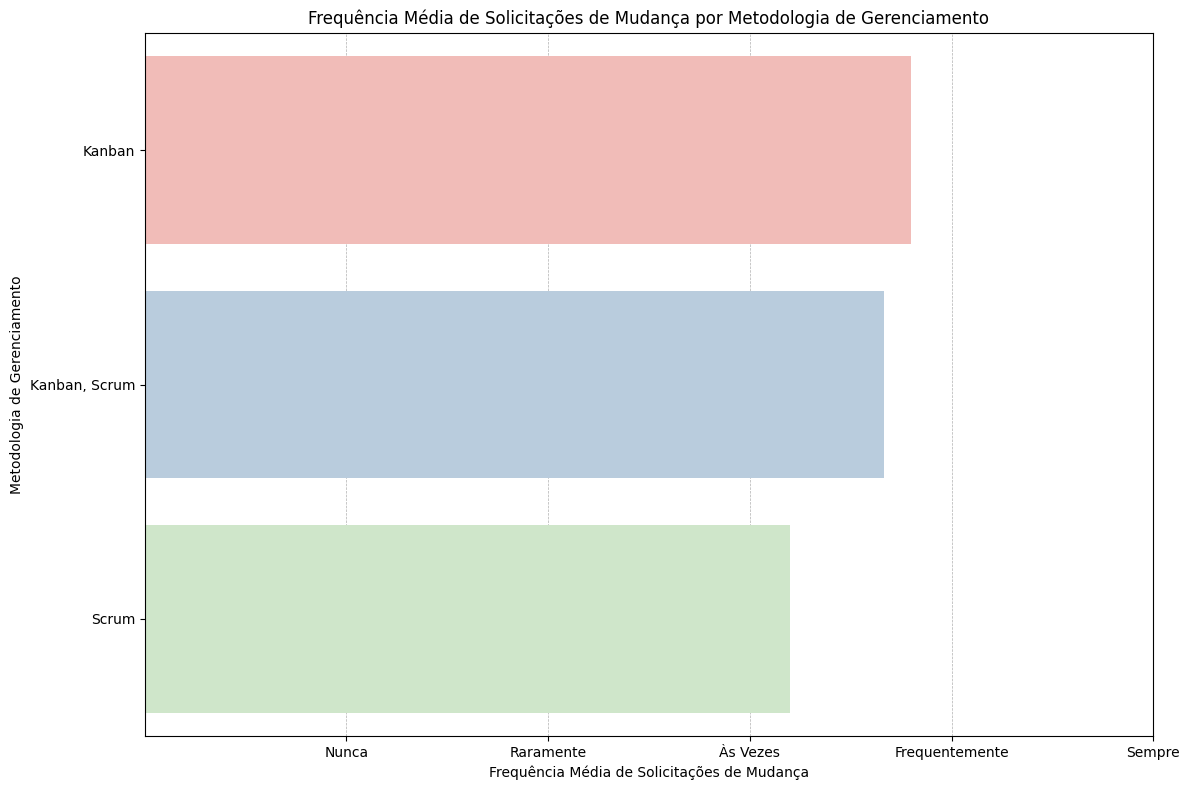

In [422]:
# Agrupar por metodologia e calcular a média das frequências
freq_grouped = data.groupby("Metodologia de gerenciamento")["Frequência de solicitações de mudança"].mean().reset_index()

# Ordenar por frequência média para melhor visualização
freq_grouped = freq_grouped.sort_values(by="Frequência de solicitações de mudança", ascending=False)

# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

bar_plot = sns.barplot(x="Frequência de solicitações de mudança", y="Metodologia de gerenciamento", data=freq_grouped, palette="Pastel1")

ax.xaxis.grid(True, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Personalizar o eixo x para mostrar os rótulos da escala Likert
bar_plot.set_xticks(list(likert_scale.values()))
bar_plot.set_xticklabels([likert_labels[val] for val in likert_scale.values()])

plt.xlabel("Frequência Média de Solicitações de Mudança")
plt.ylabel("Metodologia de Gerenciamento")
plt.title("Frequência Média de Solicitações de Mudança por Metodologia de Gerenciamento")
plt.tight_layout()
plt.savefig('plots/q4/gerenciamento_frequencia.png', format='png', transparent=True)
plt.show()

### Consequências

In [423]:
data['Consequências da solicitação de mudanças']

0     Análise de Impacto, Avaliação de Risco, Implem...
1                                    Avaliação de Risco
2                 Revisão do Projeto, Revisão da Sprint
3     Análise de Impacto, Revisão da Sprint, Impleme...
4     Análise de Impacto, Avaliação de Risco, Revisã...
5                Análise de Impacto, Avaliação de Risco
6          Revisão do Projeto, Implementação da Mudança
7     Qualificação da Mudança, Avaliação de Risco, I...
8     Análise de Impacto, Avaliação de Risco, Revisã...
9     Avaliação de Risco, Revisão do Projeto, Implem...
10    Análise de Impacto, Revisão do Projeto, Revisã...
11    Análise de Impacto, Qualificação da Mudança, A...
12    Análise de Impacto, Avaliação de Risco, Implem...
Name: Consequências da solicitação de mudanças, dtype: object

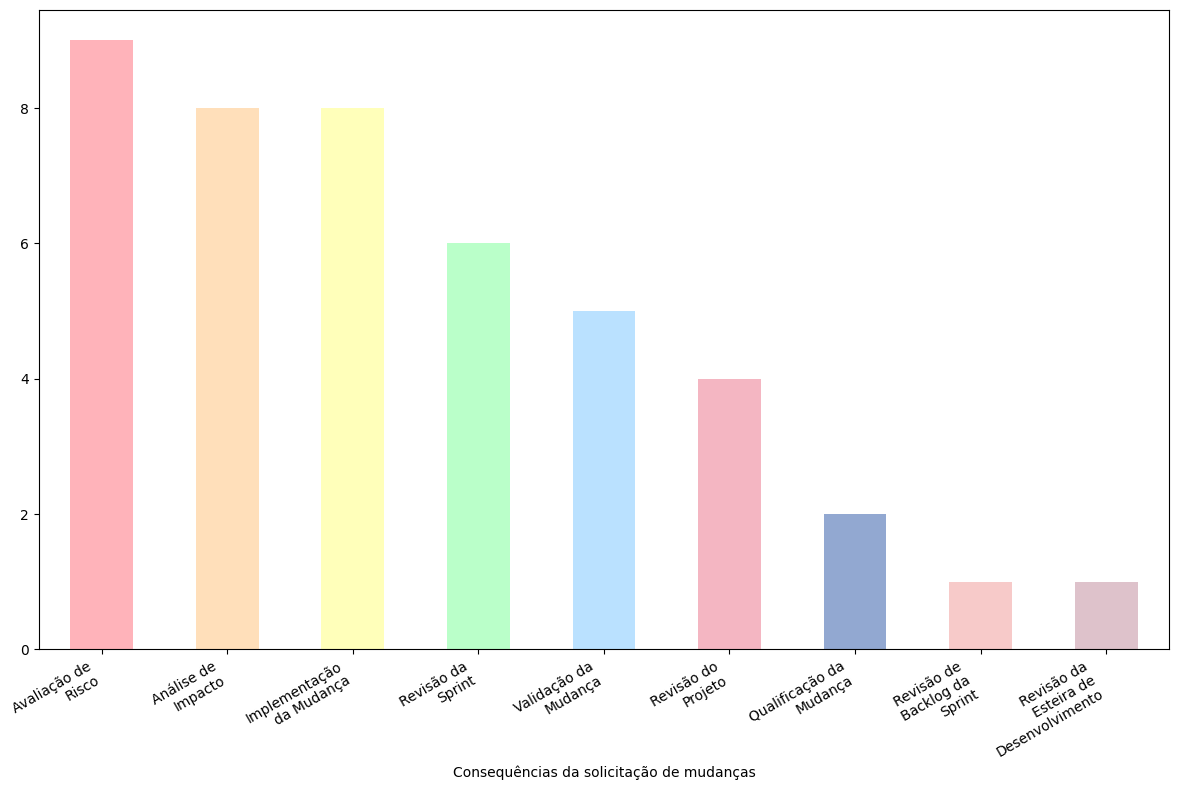

In [424]:
# Dividir as strings em listas de consequências e explodir para criar entradas individuais
consequencias_exploded = data["Consequências da solicitação de mudanças"].str.split(', ').explode()

# Contar as ocorrências de cada consequência
consequencias_counts = consequencias_exploded.value_counts()

origem = list(consequencias_counts.keys())
adjusted_labels = adjust_labels(origem, max_width=15)

# Plotar o gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(12, 8))
consequencias_counts.plot(kind='bar', color=pastel_colors)

ax.set_xticks(range(len(adjusted_labels)))
ax.set_xticklabels(adjusted_labels, rotation=0, ha='center')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.savefig('plots/q4/consequencias_solicitacao.png', transparent=True)

plt.show()

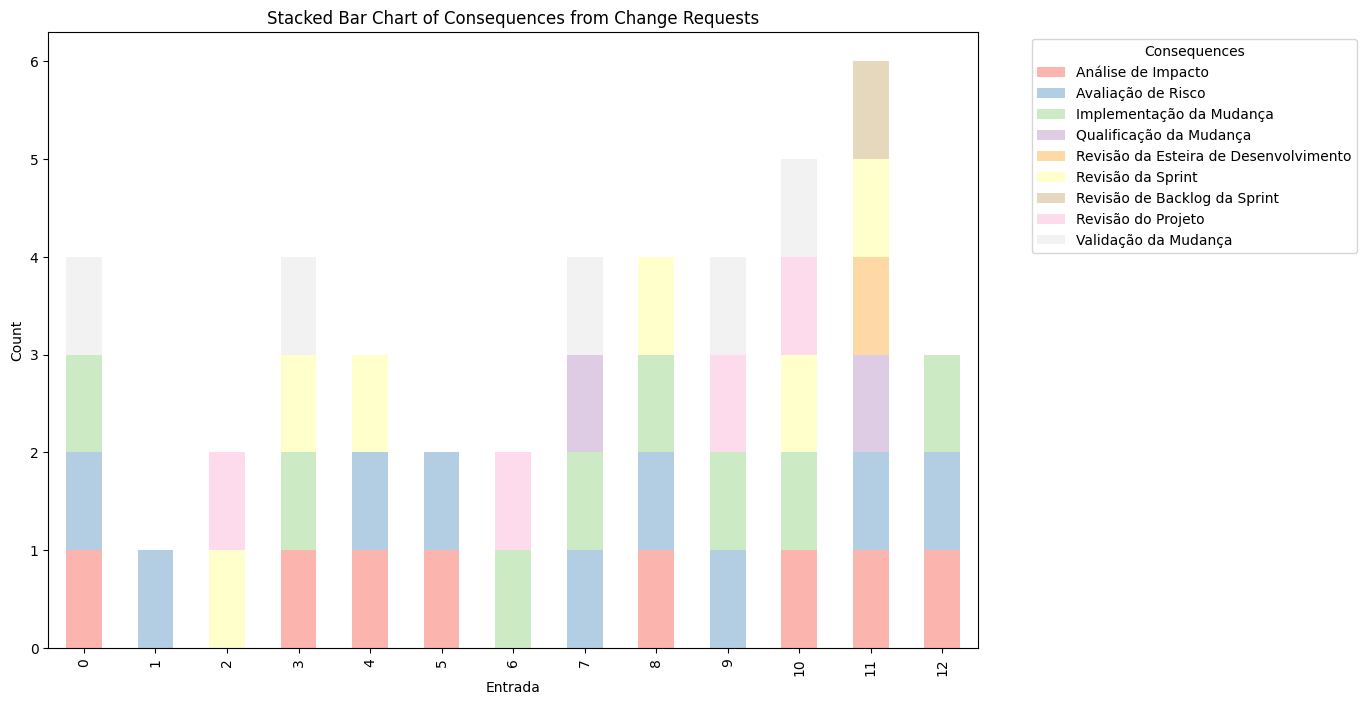

In [426]:
# Dividir as strings em listas de consequências e explodir para criar entradas individuais
consequencias_exploded = data["Consequências da solicitação de mudanças"].str.split(', ').explode()

# Contar as ocorrências de cada consequência
consequencias_counts = consequencias_exploded.value_counts().reset_index()
consequencias_counts.columns = ["Consequence", "Count"]

# Criar um DataFrame com uma linha para cada ocorrência de consequência
consequencias_counts = consequencias_exploded.value_counts().reset_index()
consequencias_counts.columns = ['Consequences', 'Count']

# Criar um DataFrame para barras empilhadas
stacked_data = pd.crosstab(consequencias_exploded.index, consequencias_exploded)

# Plotar o gráfico de barras empilhadas
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="Pastel1")

plt.xlabel("Entrada")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Consequences from Change Requests")
plt.legend(title="Consequences", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

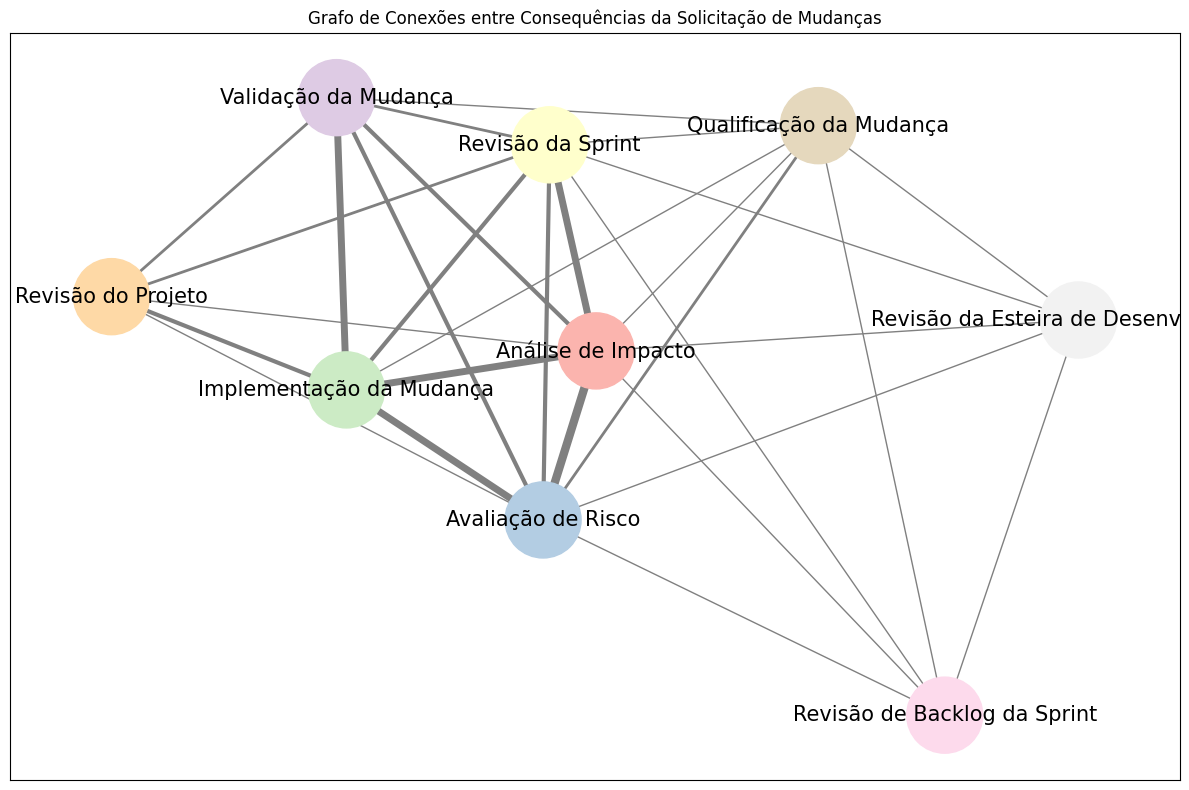

In [406]:
# Dividir as strings em listas de consequências
data_splited = data["Consequências da solicitação de mudanças"].str.split(", ")

# Inicializar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas ao grafo com pesos
for consequencias in data_splited:
    for i in range(len(consequencias)):
        for j in range(i + 1, len(consequencias)):
            if G.has_edge(consequencias[i], consequencias[j]):
                G[consequencias[i]][consequencias[j]]['weight'] += 1
            else:
                G.add_edge(consequencias[i], consequencias[j], weight=1)

# Obter uma paleta de cores pastel
colors = sns.color_palette("Pastel1", len(G.nodes()))

# Criar um dicionário de cores para os nós
node_colors = {node: colors[i] for i, node in enumerate(G.nodes())}

# Plotar o grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Layout do grafo

# Desenhar as arestas com pesos
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Aplicar as cores aos nós
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')
nx.draw_networkx_nodes(G, pos, node_color=[node_colors[node] for node in G.nodes()], node_size=3000)
nx.draw_networkx_labels(G, pos, font_size=15)

plt.title("Grafo de Conexões entre Consequências da Solicitação de Mudanças")
plt.tight_layout()
# plt.savefig('plots/q4/consequencias_grafo.png', format='png', transparent=True)
plt.show()